# plot Linear policies 2 

        19 Jun 2023  JMA

In [7]:
import os, re, sys, math, glob
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# "\\wsl.localhost\Ubuntu\home\jma\repos\bogovirus\stage\SVsamples-200_step_size-10_max_infection-150_severity_ceiling-120_max_days-100_171-00-27.csv"
A = pd.read_csv('../stage/SVsamples-200_step_size-10_max_infection-150_severity_ceiling-120_max_days-100_171-00-09.csv', index_col=0)
A.drop('QN', axis=1, inplace=True)

In [9]:
x = A.cohort.map(lambda x: [float(z) for z in re.findall(r'([-\.\d]+)',  x) ]  )
# the DataFrame constructor takes lists
A[['dose', 'daily_change']] = pd.DataFrame(x.to_list())
A.drop('cohort', axis=1, inplace=True)
# Compute each cohort survival rate
cohorts = A.groupby(['dose', 'daily_change']).agg(lambda z: sum(z >0))
cohorts['survival'] = cohorts.reward / cohorts.day_number   # Divide by any column with positive values to get the count
cohorts.reset_index(inplace=True)
display(cohorts)

/tmp/ipykernel_8053/3505580961.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  cohorts = A.groupby(['dose', 'daily_change']).agg(lambda z: sum(z >0))


,dose,daily_change,day_number,infection,severity,reward,drug,cum_drug,efficacy,survival
0,0.4,-0.050,200,200,200,158,200,200,200,0.790
1,0.4,-0.045,200,200,200,176,200,200,200,0.880
2,0.4,-0.040,200,200,200,158,200,200,200,0.790
3,0.4,-0.035,200,200,200,171,200,200,200,0.855
4,0.4,-0.030,200,200,200,172,200,200,200,0.860
...,...,...,...,...,...,...,...,...,...,...
190,0.7,-0.010,200,200,200,188,200,200,200,0.940
191,0.7,-0.005,200,200,200,188,200,200,200,0.940
192,0.7,0.000,200,200,200,189,200,200,200,0.945
193,0.7,0.005,200,200,200,183,200,200,200,0.915


max at -0.00898


Text(-0.008978599221789937, 0.9, '  Max: -0.00898')

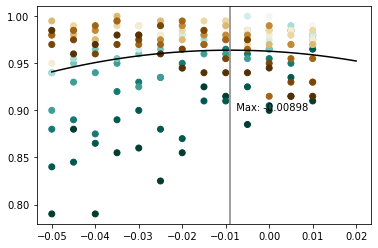

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
import random

clrs = cm.get_cmap('plasma', 21)

plotable = cohorts[['dose', 'daily_change', 'survival']]
near_slope = plotable # plotable.loc[(plotable.daily_change <= 0.02) & (plotable.daily_change > -0.06 ),:]
p3 = np.polyfit(near_slope.daily_change, near_slope.survival, 2)
x_dose = np.linspace(-0.05, 0.02)
y_func = np.poly1d(p3)
quadratic_max = - p3[1]/(2 * p3[0])
print(f'max at {quadratic_max:.3}')
#plotable['dose'] = plotable['dose'].astype(str)
#plotable['survival'] = plotable['survival'].apply(lambda z: z +random.uniform(-0.1, 0.0))
plt.scatter(plotable.daily_change, plotable.survival, marker='o',   c=plotable.dose, cmap='BrBG_r')
plt.plot(x_dose, y_func(x_dose), 'black')
plt.axvline(quadratic_max, color='grey')
plt.text(quadratic_max, 0.9, f'  Max: {quadratic_max:.3}')


Quadratic max at 0.585


Text(0.5850611878751955, 0.9, '  Max: 0.585')

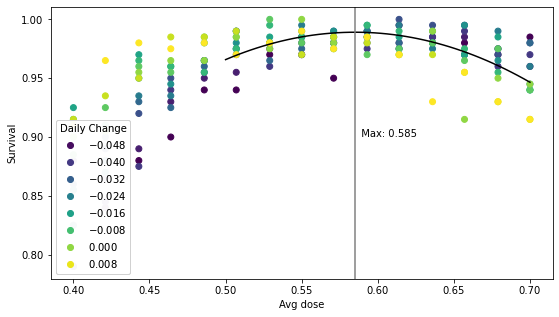

In [11]:
#display(plotable.sort_values('survival', ascending=False))
near_max = plotable.loc[(plotable.daily_change <= 0.02) & (plotable.daily_change > -0.06 ),:]
p3 = np.polyfit(near_max.dose, near_max.survival, 2)
x_dose = np.linspace(0.5, 0.7)
y_func = np.poly1d(p3)
quadratic_max = - p3[1]/(2 * p3[0])
print(f'Quadratic max at {quadratic_max:.3}')

fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(5)
sc = ax.scatter(near_max.dose, near_max.survival, c=near_max.daily_change)
ax.plot(x_dose, y_func(x_dose), 'black')
ax.set_xlabel('Avg dose')
ax.set_ylabel('Survival')
legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Daily Change")
ax.add_artist(legend1)
ax.axvline(quadratic_max, color='grey')
ax.text(quadratic_max, 0.9, f'  Max: {quadratic_max:.3}')

In [12]:
# Dose sequence
day = list(range(16))
print([-0.015 * (d - 6) + 0.6 for d in day])



[0.69, 0.6749999999999999, 0.6599999999999999, 0.645, 0.63, 0.615, 0.6, 0.585, 0.57, 0.5549999999999999, 0.54, 0.525, 0.51, 0.495, 0.48, 0.46499999999999997]
